# Table of Contents
 <p><div class="lev1"><a href="#Scoring"><span class="toc-item-num">1&nbsp;&nbsp;</span>Scoring</a></div><div class="lev2"><a href="#Train-test-split"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Train test split</a></div><div class="lev2"><a href="#Fit"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Fit</a></div><div class="lev2"><a href="#Predict"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Predict</a></div><div class="lev2"><a href="#Score"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Score</a></div><div class="lev2"><a href="#Logloss"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Logloss</a></div><div class="lev2"><a href="#Confusion-Matrix"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Confusion Matrix</a></div><div class="lev1"><a href="#Cross-validation"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cross validation</a></div><div class="lev2"><a href="#Train-testsplit"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Train testsplit</a></div><div class="lev2"><a href="#Cross-val-score"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Cross val score</a></div><div class="lev1"><a href="#Optimal-parameters-search"><span class="toc-item-num">3&nbsp;&nbsp;</span>Optimal parameters search</a></div><div class="lev2"><a href="#GridSearchCV"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>GridSearchCV</a></div><div class="lev2"><a href="#Predict-with-best-estimator"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Predict with best estimator</a></div><div class="lev1"><a href="#Overfitting-and-underfitting-detection"><span class="toc-item-num">4&nbsp;&nbsp;</span>Overfitting and underfitting detection</a></div><div class="lev2"><a href="#Learning-curve"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Learning curve</a></div><div class="lev2"><a href="#Validation-Curve"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Validation Curve</a></div>

In [2]:
%load load_and_enrich.py

CPU times: user 3.66 s, sys: 258 ms, total: 3.92 s
Wall time: 5.23 s
CPU times: user 3.37 s, sys: 196 ms, total: 3.57 s
Wall time: 3.57 s
CPU times: user 4.94 s, sys: 838 ms, total: 5.78 s
Wall time: 6.73 s
CPU times: user 527 ms, sys: 63.5 ms, total: 590 ms
Wall time: 715 ms
CPU times: user 552 ms, sys: 131 ms, total: 683 ms
Wall time: 700 ms


In [4]:
%load prepare_data_for_sklearn.py

# Scoring

## Train test split

Let's split our train data in two

In [22]:
from sklearn.cross_validation import train_test_split
%time X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3)
X_train.head()

CPU times: user 815 ms, sys: 70.4 ms, total: 886 ms
Wall time: 884 ms


,Hour,Month,Year,X,Y,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
547090,18,8,2007,-122.419698,37.777301,0.0,0.0,0.0,1.0,0.0,0.0,0.0
172530,7,1,2013,-122.426153,37.760619,0.0,0.0,0.0,0.0,0.0,0.0,1.0
236119,22,3,2012,-122.413174,37.786719,0.0,0.0,0.0,0.0,0.0,1.0,0.0
153960,9,5,2013,-122.474445,37.718302,0.0,0.0,1.0,0.0,0.0,0.0,0.0
877258,22,1,2003,-122.435824,37.762553,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
print("Number of sample in test: %d" % len(X_test))
print("Number of sample in train: %d" % len(X_train))
print("Computed Ratio: %f" % (float(len(X_test))/(len(X_train) + len(X_test))))

Number of sample in test: 263415
Number of sample in train: 614634
Computed Ratio: 0.300000


Now let's create a Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, criterion='gini', min_samples_split=2)

## Fit

And now let's train it

In [24]:
%time rf.fit(X_train,y_train)

CPU times: user 1min 26s, sys: 7.39 s, total: 1min 34s
Wall time: 1min 36s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predict

And now let's predict on the retained data

In [25]:
%time y_pred = rf.predict(X_test)

CPU times: user 10.8 s, sys: 14.2 s, total: 25.1 s
Wall time: 1min 26s


## Score

Which score did I achieve on the test fold ?

In [27]:
%time score = rf.score(X_test, y_test)
print("NB SAMPLE TESTED: %d" % len(X_test))
print("GOOD CLASSIFICATIONS: %d" % np.sum(np.equal(y_pred, y_test)))
print("ACURACY: %f" % score)

NB SAMPLE TESTED: 263415
GOOD CLASSIFICATIONS: 72242
ACURACY: 0.274252


Actually Kaggle relies on the log loss. What is my log loss score ?

## Logloss

In [28]:
%time y_pred_proba = rf.predict_proba(X_test)

CPU times: user 10.4 s, sys: 11.5 s, total: 21.9 s
Wall time: 26 s


In [30]:
from sklearn.metrics import log_loss

%time score = log_loss(y_pred=y_pred_proba, y_true=y_test)
print ("LOG LOSS SCORE: %f" % score)

CPU times: user 2.43 s, sys: 191 ms, total: 2.62 s
Wall time: 3.12 s
LOG LOSS SCORE: 9.066396


## Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix

ordered_categories = list(train.Category.value_counts().index)
%time confusion_m = confusion_matrix(y_test, y_pred, ordered_categories)
confusion_m

CPU times: user 783 ms, sys: 19.8 ms, total: 803 ms
Wall time: 806 ms


array([[28994,  5648,  4715, ...,     2,     0,     0],
       [ 7621, 10505,  2991, ...,     5,     0,     0],
       [ 9622,  4167,  5121, ...,     2,     0,     1],
       ..., 
       [   10,     7,     2, ...,     4,     0,     0],
       [    2,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0]])

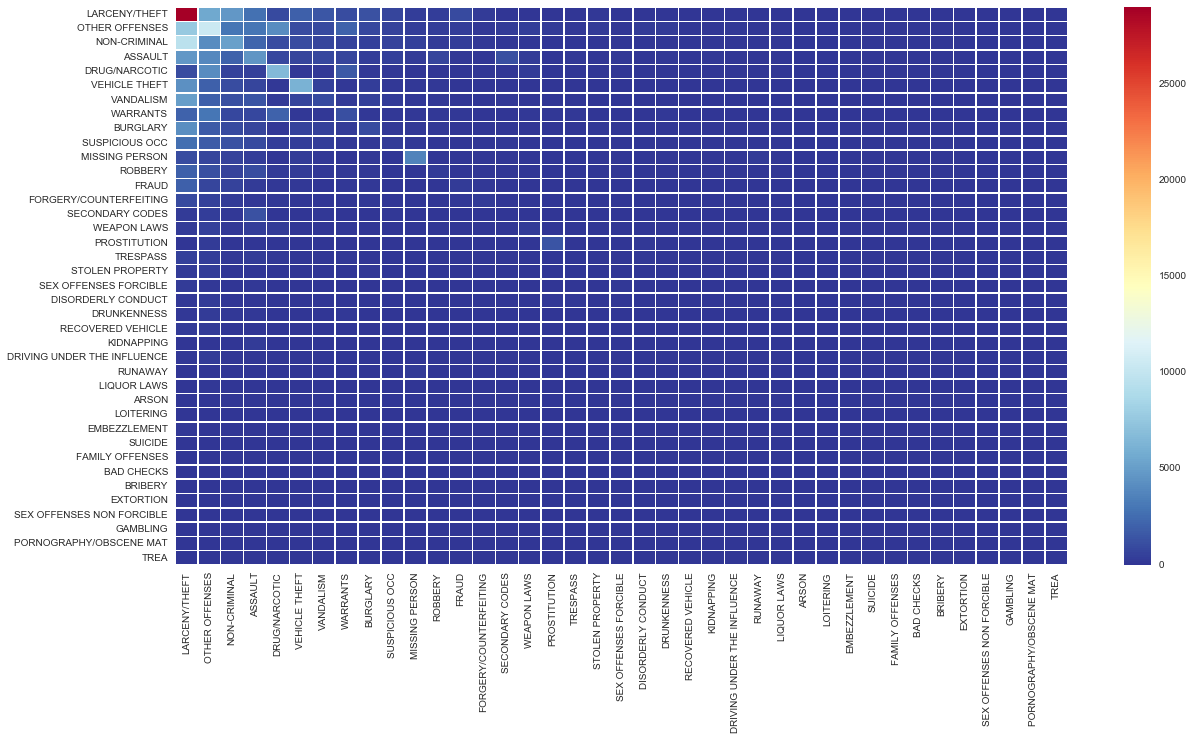

In [43]:
import seaborn as sns
from matplotlib import cm 
plt.figure(figsize=(20,10))
sns.heatmap(confusion_m, linewidths=.5,xticklabels=ordered_categories,yticklabels=ordered_categories,cmap=cm.RdYlBu_r)
plt.show()

# Cross validation

## Train testsplit

In [45]:
%time X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3)

CPU times: user 847 ms, sys: 238 ms, total: 1.08 s
Wall time: 1.85 s


## Cross val score

In [47]:
from sklearn.cross_validation import cross_val_score
%time scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='log_loss')
scores

CPU times: user 2min 12s, sys: 21.2 s, total: 2min 33s
Wall time: 2min 53s


array([ 0.24831221,  0.24983528,  0.24485662,  0.24731935,  0.24418283])

In [48]:
print("MEAN %f / STD: %f" % (np.mean(scores) ,np.std(scores)))

MEAN 0.246901 / STD: 0.002114


# Optimal parameters search

Is there a way to find the optimal parameters to get the best possible score ?    
We now define the parameters we want to use for the optimization.

In [49]:
params= [{
    'n_estimators'      : [10],
    'max_depth'         : [1,3,5],
    'min_samples_split' : [2, 5, 10],
    'criterion'         : ["entropy", "gini"],
},]

## GridSearchCV

In [ ]:
gs = GridSearchCV(rf, param_grid=params, scoring="log_loss", cv=5)

In [ ]:
gs.fit(X_train, Y_train);pass

In [ ]:
print("Best score %s",gs.best_score_)
print("Best params %s",gs.best_params_)

## Predict with best estimator

In [ ]:
best_rf = gs.best_estimator_
y_pred_proba = best_rf.predict_proba(X_test)
print ("LOG LOSS SCORE: %f" % log_loss(y_pred=y_pred_proba, y_true=y_test))

# Overfitting and underfitting detection

## Learning curve

In [ ]:
from sklearn.learning_curve import learning_curve
%time train_sizes, train_scores, test_scores = learning_curve(best_rf, X, y, cv=5)

There seems to be a significant bias in our model

In [ ]:
plt.figure()
plt.title(title)
if ylim is not None:
    plt.ylim(*ylim)
plt.xlabel("Training examples")
plt.ylabel("Score")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

## Validation Curve

In [51]:
from sklearn.learning_curve import validation_curve

In [ ]:
train_scores, test_scores = validation_curve(rf, X, y, param_name="max_depth", param_range =[2,5,10,15],
        cv=5, scoring="log_loss")

In [ ]:
plt.figure()
plt.title("Validation Curve")
plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5,label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--',marker='s', markersize=5,label='validation accuracy')
plt.fill_between(param_range,test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('Accuracy')
plt.show()

In [52]:
%load_ext version_information
%version_information numpy,pandas,matplotlib,sklearn,seaborn

Software versions
Python 3.5.1 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 4.2.0
OS Darwin 14.3.0 x86_64 i386 64bit
numpy 1.10.4
pandas 0.18.1
matplotlib 1.5.1
sklearn 0.17.1
seaborn 0.7.0
Mon May 30 22:12:24 2016 BST